In [2]:
import os
import pandas as pd
%matplotlib inline

from path import Path
import numpy as np
import hvplot.pandas
import nltk
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
from ibm_watson import ToneAnalyzerV3
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
import panel as pn
from nltk.corpus import reuters
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')

plt.style.use("seaborn-whitegrid")
pn.extension("plotly")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/enriqueserizawa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:

analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
news_api = os.getenv("news_api")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api)

In [6]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en", page_size=100)
bitcoin_news["totalResults"]

4494

In [7]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en", page_size=100)
ethereum_news["totalResults"]

1168

In [8]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/enriqueserizawa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
# Define a function to get the sentiment scores
def get_sentiment_scores(text, date, source, url):
    sentiment_scores = {}

    # Sentiment scoring with VADER
    text_sentiment = analyzer.polarity_scores(text)
    sentiment_scores["date"] = date
    sentiment_scores["text"] = text
    sentiment_scores["source"] = source
    sentiment_scores["url"] = url
    sentiment_scores["compound"] = text_sentiment["compound"]
    sentiment_scores["pos"] = text_sentiment["pos"]
    sentiment_scores["neu"] = text_sentiment["neu"]
    sentiment_scores["neg"] = text_sentiment["neg"]
    if text_sentiment["compound"] >= 0.05:  # Positive
        sentiment_scores["normalized"] = 1
    elif text_sentiment["compound"] <= -0.05:  # Negative
        sentiment_scores["normalized"] = -1
    else:
        sentiment_scores["normalized"] = 0  # Neutral

    return sentiment_scores

In [11]:
# Empty list to store the DataFrame structure
sentiments_data = []

# Loop through all the news articles
for article in bitcoin_news["articles"]:
    try:
        # Get sentiment scoring using the get_sentiment_score() function
        sentiments_data.append(
            get_sentiment_scores(
                article["content"],
                article["publishedAt"][:10],
                article["source"]["name"],
                article["url"],
            )
        )

    except AttributeError:
        pass

# Create a DataFrame with the news articles' data and their sentiment scoring results
bitcoin_df = pd.DataFrame(sentiments_data)

# Sort the DataFrame rows by date
bitcoin_df = bitcoin_df.sort_values(by="date", ascending=False)

# Define the date column as the DataFrame's index
bitcoin_df.set_index("date", inplace=True)
bitcoin_df.head()

compound    neg    neu  normalized    pos        source  \
date                                                                  
2019-10-25    0.5070  0.000  0.933           1  0.067  The Next Web   
2019-10-25    0.3506  0.037  0.872           1  0.091  Schneier.com   
2019-10-25   -0.7339  0.212  0.700          -1  0.088  The Next Web   
2019-10-24    0.4019  0.076  0.835           1  0.089  The Next Web   
2019-10-24   -0.7003  0.127  0.873          -1  0.000  Slashdot.org   

                                                         text  \
date                                                            
2019-10-25  Our robot colleague Satoshi Nakaboto writes ab...   
2019-10-25  The US Department of Justice unraveled a dark ...   
2019-10-25  Twitter CEO Jack Dorsey has said the popular m...   
2019-10-24  Welcome to Hard Fork Basics, a collection of t...   
2019-10-24  The attacks, brought to ZDNet's attention by o...   

                                                          url  
date                                                           
2019-10-25  https://thenextweb.com/hardfork/2019/10/25/sat...  
2019-10-25  https://www.schneier.com/blog/archives/2019/10...  
2019-10-25  https://thenextweb.com/hardfork/2019/10/25/twi...  
2019-10-24  https://thenextweb.com/hardfork/2019/10/24/a-q...  
2019-10-24  https://it.slashdot.org/story/19/10/24/1947237...

In [12]:
# Define a function to get the sentiment scores
def get_sentiment_scores(text, date, source, url):
    sentiment_scores = {}

    # Sentiment scoring with VADER
    text_sentiment = analyzer.polarity_scores(text)
    sentiment_scores["date"] = date
    sentiment_scores["text"] = text
    sentiment_scores["source"] = source
    sentiment_scores["url"] = url
    sentiment_scores["compound"] = text_sentiment["compound"]
    sentiment_scores["pos"] = text_sentiment["pos"]
    sentiment_scores["neu"] = text_sentiment["neu"]
    sentiment_scores["neg"] = text_sentiment["neg"]
    if text_sentiment["compound"] >= 0.05:  # Positive
        sentiment_scores["normalized"] = 1
    elif text_sentiment["compound"] <= -0.05:  # Negative
        sentiment_scores["normalized"] = -1
    else:
        sentiment_scores["normalized"] = 0  # Neutral

    return sentiment_scores

# Empty list to store the DataFrame structure
sentiments_data = []


# Loop through all the news articles
for article in ethereum_news["articles"]:
    try:
        # Get sentiment scoring using the get_sentiment_score() function
        sentiments_data.append(
            get_sentiment_scores(
                article["content"],
                article["publishedAt"][:10],
                article["source"]["name"],
                article["url"],
            )
        )

    except AttributeError:
        pass

# Create a DataFrame with the news articles' data and their sentiment scoring results
ethereum_df = pd.DataFrame(sentiments_data)

# Sort the DataFrame rows by date
ethereum_df = ethereum_df.sort_values(by="date", ascending=False)

# Define the date column as the DataFrame's index
ethereum_df.set_index("date", inplace=True)
ethereum_df.head()

compound    neg    neu  normalized    pos        source  \
date                                                                  
2019-10-25    0.0000  0.000  1.000           0  0.000  Coindesk.com   
2019-10-25    0.6597  0.000  0.873           1  0.127  Coindesk.com   
2019-10-24    0.2500  0.000  0.951           1  0.049    Ghacks.net   
2019-10-24   -0.8779  0.287  0.652          -1  0.061    Forbes.com   
2019-10-24    0.0000  0.000  1.000           0  0.000  Coindesk.com   

                                                         text  \
date                                                            
2019-10-25  Ethereums next system-wide upgrade, Istanbul, ...   
2019-10-25  The Takeaway\r\n<ul><li>New analysis of the ec...   
2019-10-24  The Complete Blockchain &amp; Ethereum Program...   
2019-10-24  Libra has been hurt by Facebooks deficit of tr...   
2019-10-24  The Takeaway:\r\n<ul><li>Moving ETH from the E...   

                                                          url  
date                                                           
2019-10-25  https://www.coindesk.com/ethereum-targets-dec-...  
2019-10-25  https://www.coindesk.com/3-ways-staking-will-u...  
2019-10-24  https://www.ghacks.net/2019/10/24/ghacks-deals...  
2019-10-24  https://www.forbes.com/sites/tedknutson/2019/1...  
2019-10-24  https://www.coindesk.com/5-takeaways-on-ethere...

In [13]:
bitcoin_df.describe()

compound        neg        neu  normalized        pos
count  97.000000  97.000000  97.000000   97.000000  97.000000
mean   -0.009941   0.066928   0.869052    0.030928   0.064021
std     0.520088   0.069303   0.077033    0.962350   0.055769
min    -0.916900   0.000000   0.678000   -1.000000   0.000000
25%    -0.458800   0.000000   0.823000   -1.000000   0.027000
50%     0.025800   0.060000   0.883000    0.000000   0.062000
75%     0.507000   0.115000   0.932000    1.000000   0.084000
max     0.943700   0.293000   1.000000    1.000000   0.322000

In [15]:
ethereum_df.describe()

compound        neg        neu  normalized        pos
count  96.000000  96.000000  96.000000   96.000000  96.000000
mean    0.113946   0.037906   0.901885    0.270833   0.060208
std     0.434479   0.062321   0.080196    0.864251   0.059618
min    -0.950900   0.000000   0.649000   -1.000000   0.000000
25%    -0.091425   0.000000   0.849250   -1.000000   0.000000
50%     0.128000   0.000000   0.917500    1.000000   0.055500
75%     0.401900   0.060000   0.952250    1.000000   0.091000
max     0.906100   0.351000   1.000000    1.000000   0.270000

# Bitcoin vs Ethereum Sentiment Analysis Results

### 1. Which coin had the highest mean positive score?
####    A. Bitcoin has the highes positive mean score.

### 2. Which coin had the highest negative score?
####    A. Bitcoin has also the highest max negative score.

### 3. Which coin had the highest positive score?
####    A. Bitcoin has the highes positive score.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [59]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from nltk.util import ngrams
import re
import nltk
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/enriqueserizawa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/enriqueserizawa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
btc_raw_stories = bitcoin_df["text"].tolist()
eth_raw_stories = ethereum_df["text"].tolist()
#raw_stories   

In [85]:
# sentence tokenize stories
btc_sentence_tokenized = [sent_tokenize(i) for i in btc_raw_stories]
eth_sentence_tokenized = [sent_tokenize(i) for i in eth_raw_stories]

In [86]:
#Converting raw_stories list to a string.
btc_raw_stories_str = ''.join(btc_raw_stories)
eth_raw_stories_str = ''.join(eth_raw_stories)

In [87]:
lemmatizer = WordNetLemmatizer()

In [88]:
# define stopwording and regex 
def process_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [89]:
btc_processed = process_text(btc_raw_stories_str)
eth_processed = process_text(eth_raw_stories_str)
#print(processed)

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [90]:
from collections import Counter

In [82]:
# get word counts for Bitcoin
btc_word_counts = Counter(btc_processed)
# get top 10 words
print(dict(btc_word_counts.most_common(10)))

{'bitcoin': 92, 'satoshi': 42, 'nakaboto': 38, 'btc': 28, 'today': 26, 'cryptocurrency': 25, 'every': 23, 'past': 22, 'writes': 20, 'another': 20}


In [83]:
# get top 10 Bi-gram counts for Bitcoin
btc_bigram_counts = Counter(ngrams(btc_processed, n=2))

In [80]:
print(dict(btc_bigram_counts.most_common(10)))

{('satoshi', 'nakaboto'): 38, ('bitcoin', 'btc'): 28, ('robot', 'colleague'): 19, ('colleague', 'satoshi'): 19, ('nakaboto', 'writes'): 19, ('writes', 'bitcoin'): 19, ('btc', 'every'): 19, ('every', 'fucking'): 19, ('fucking', 'daywelcome'): 19, ('daywelcome', 'another'): 19}


In [91]:
# get word counts for Ethereum
eth_word_counts = Counter(eth_processed)
# get top 10 words
print(dict(eth_word_counts.most_common(10)))

{'ethereum': 73, 'blockchain': 28, 'ha': 26, 'bitcoin': 26, 'day': 20, 'cryptocurrency': 18, 'morning': 16, 'early': 15, 'cryptocurrencies': 13, 'charsethereumethereum': 11}


In [92]:
# get top 10 Bi-gram counts for Ethereum
eth_bigram_counts = Counter(ngrams(eth_processed, n=2))

In [93]:
print(dict(eth_bigram_counts.most_common(10)))

{('early', 'morning'): 13, ('ethereum', 'ended'): 11, ('ended', 'day'): 9, ('morning', 'intraday'): 9, ('start', 'day'): 8, ('day', 'saw'): 8, ('saw', 'ethereum'): 8, ('intraday', 'high'): 6, ('intraday', 'low'): 5, ('complete', 'blockchain'): 4}


---

# WordCloud

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

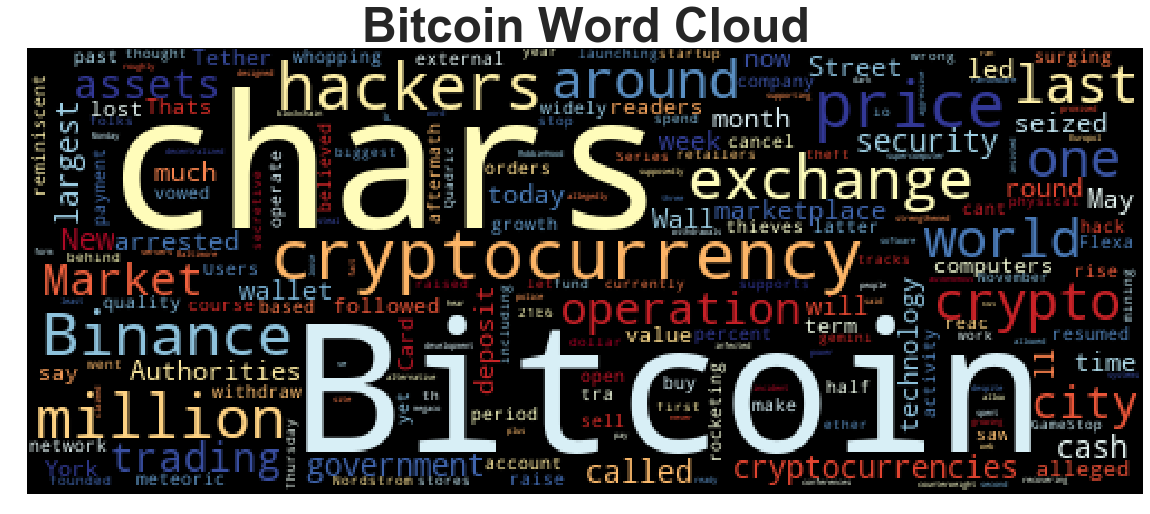

In [25]:
# Generate the Bitcoin word cloud

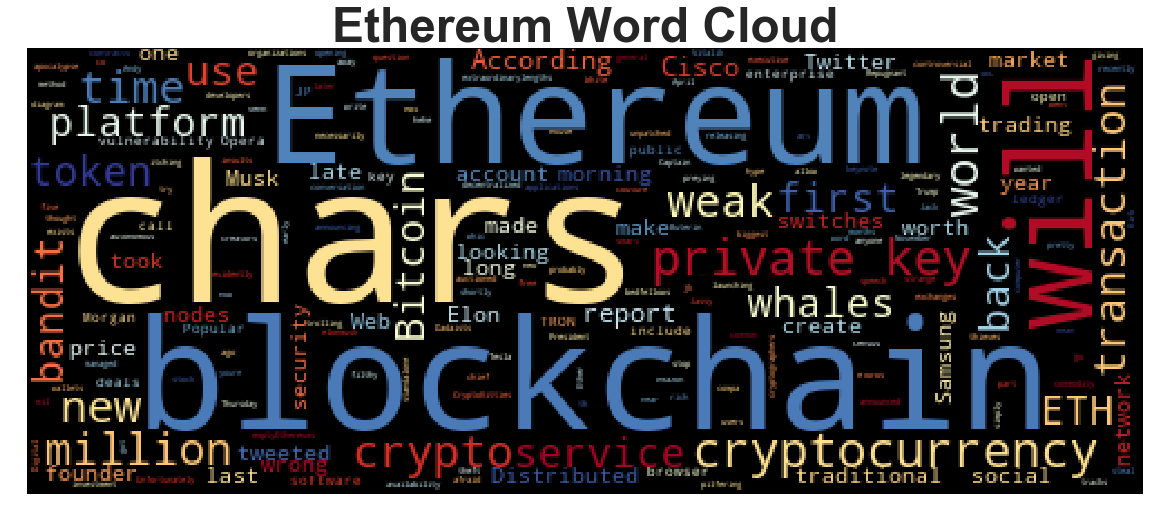

In [26]:
# Generate the Ethereum word cloud

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together

'Cryptocurrency exchange Binance has resumed trading activity. Users can now cancel open orders, deposit crypto assets into their Binance account, and of course buy and sell cryptocurrencies. You cant withdraw crypto assets to an external wallet just yet, but … [+1191 chars]Bitcoin is now trading at around $8,130, up a whopping 60.84 percent over the past month, with the price surging $3,086.14 over the period.\r\nThe cryptocurrency’s meteoric rise is reminiscent of its rocketing growth in the latter half of 2017, when prices reac… [+4311 chars]Binance has vowed to raise the quality of its security in the aftermath of a hack that saw thieves make off with over $40 million in Bitcoin from the exchange.\r\nThe company — which is widely believed to operate the world’s largest crypto exchange based on tra… [+2269 chars]A new payment network called Flexa is launching today that’ll let you spend cryptocurrencies in physical stores. The technology currently supports bitcoin, ether, bitcoin ca

In [31]:
# Run the NER processor on all of the text

# Add a title to the document

In [32]:
# Render the visualization

In [33]:
# List all Entities

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text

# Add a title to the document

In [36]:
# Render the visualization

In [37]:
# List all Entities

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f